<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa3_DigitosMnist_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 3 - Dígitos MNIST com rede totalmente conectada

O objetivo é adaptar o classificador mostrado para a base Fashion MNIST para a base de Dígitos do MNIST, que contem amostras de dígitos manuscritos de 0 a 9, devidamente rotulados.

O classificador deve treinar até atingir acurácia de 99% e ser interrompido por uma callback.

Você deve completar os trechos indicados do código.




In [1]:

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalização das imagens

x_train  = x_train / 255.0
x_test = x_test / 255.0


# declaração do modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8811 - loss: 0.4218 - val_accuracy: 0.9613 - val_loss: 0.1393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9652 - loss: 0.1189 - val_accuracy: 0.9690 - val_loss: 0.1007
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9762 - loss: 0.0781 - val_accuracy: 0.9708 - val_loss: 0.0956
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9755 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9861 - loss: 0.0446 - val_accuracy: 0.9762 - val_loss: 0.0792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0351 - val_accuracy: 0.9779 - val_loss: 0.0707
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9924 - loss: 0.0256 - val_accuracy: 0.9763 - val_loss: 0.0789
Epoch 8/10
1875/1875 ━━━━━━━━━━━━

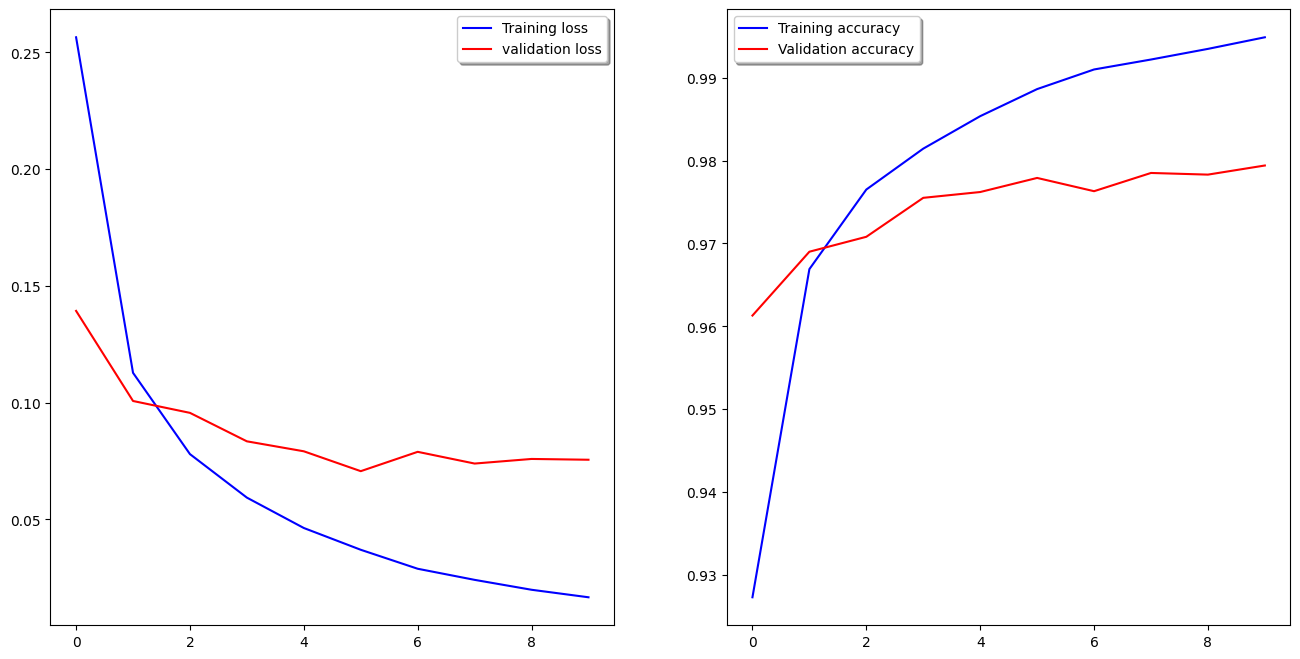

In [3]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## Versão com callback

In [4]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAtingiu acc > 0.99, cancelando treinamento")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=100, callbacks=[callbacks])





2.18.0
Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8745 - loss: 0.4382
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9632 - loss: 0.1256
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9770 - loss: 0.0784
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0578
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0432
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0325
Epoch 7/100
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0260
Atingiu acc > 0.99, cancelando treinamento
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9926 - loss: 0.0260
